Observable trends:

1) Cloudiness does not change across latitudes

2) Temperature increases as you move closer to the equator

3) Wind speed increases as you move away from the equator

In [190]:
#import dependencies
import requests
from pprint import pprint
import json
import citipy
import openweathermapy.core as owm
import random
import pandas as pd

In [191]:
# import api_key
from weather_api import api_key

In [192]:
# grab 500 random cities in worldcities.csv
city_data = pd.read_csv('citipy-0.0.5/citipy/worldcities.csv')
city_data.head()
len(city_data)

46832

In [193]:
city_sample = city_data.sample(10) #I can change this number to 500, but did 20 to save space
city_sample.head()

,Country,City,Latitude,Longitude
45939,us,montclair,38.610833,-77.340000
26220,nz,kaitangata,-46.275000,169.850000
35947,ru,gremyachye,51.974200,38.800100
5509,ch,therwil,47.501166,7.552859
11304,fi,valkeakoski,61.266667,24.033333


In [194]:
#iterate through the list of cities and perform a request for data on each
weather_json = []

city_count = 1

# set up params
params = {"appid": api_key,
          "units": "imperial"}

for index, row in city_sample.iterrows():

    # update params with zipcode each loop
    params['q'] = row['City']

    base_url = "http://api.openweathermap.org/data/2.5/weather?"

    # Print log to ensure loop is working correctly
    print("Now retrieving city # " + str(city_count) + ": " + row['City'])
    city_count += 1

    # Run requests to grab the JSON at the requested URL
    response = requests.get(base_url, params=params)
    print(response.url)

    response_json = response.json()
    weather_json.append(response_json)

Now retrieving city # 1: montclair
http://api.openweathermap.org/data/2.5/weather?appid=efbe68058e19e818378ea254e7ccdb09&units=imperial&q=montclair
Now retrieving city # 2: kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=efbe68058e19e818378ea254e7ccdb09&units=imperial&q=kaitangata
Now retrieving city # 3: gremyachye
http://api.openweathermap.org/data/2.5/weather?appid=efbe68058e19e818378ea254e7ccdb09&units=imperial&q=gremyachye
Now retrieving city # 4: therwil
http://api.openweathermap.org/data/2.5/weather?appid=efbe68058e19e818378ea254e7ccdb09&units=imperial&q=therwil
Now retrieving city # 5: valkeakoski
http://api.openweathermap.org/data/2.5/weather?appid=efbe68058e19e818378ea254e7ccdb09&units=imperial&q=valkeakoski
Now retrieving city # 6: woudrichem
http://api.openweathermap.org/data/2.5/weather?appid=efbe68058e19e818378ea254e7ccdb09&units=imperial&q=woudrichem
Now retrieving city # 7: cajetina
http://api.openweathermap.org/data/2.5/weather?appid=efbe68058e19e818378

In [195]:
# Latitude
lat_data = [data.get("coord").get("lat") for data in weather_json]

# Temperature F
temp_data = [data.get("main").get("temp") for data in weather_json]

# Humidity (%)
humidity_data = [data.get("main").get("humidity") for data in weather_json]

# Cloudiness (%)
cloud_data = [data.get("clouds").get("all") for data in weather_json]

# Wind Speed (mph)
wind_data = [data.get("wind").get("speed") for data in weather_json]

# city name
city = [data.get("name") for data in weather_json]


AttributeError: 'NoneType' object has no attribute 'get'

In [196]:
weather_dict = {"City":city, "Latitude": lat_data, "Temperature (Fahrenheit)": temp_data, 
                "Humidity (%)": humidity_data, "Cloudiness (%)": cloud_data, 
                "Wind Speed (mph)": wind_data
               }
weather_df = pd.DataFrame(weather_dict)

weather_df.to_csv("weather_final.csv")

weather_df.head()

,City,Cloudiness (%),Humidity (%),Latitude,Temperature (Fahrenheit),Wind Speed (mph)
0,Pyatigorsk,90,100,44.04,30.20,6.71
1,Bunawan,40,74,7.24,80.60,4.70
2,Yanji,0,57,42.89,12.77,8.66
3,Ligatne,76,80,57.23,12.32,8.99
4,Tiko,40,100,4.08,75.20,3.40


In [197]:
weather_df.set_index("City", inplace=True)
weather_df

,Cloudiness (%),Humidity (%),Latitude,Temperature (Fahrenheit),Wind Speed (mph)
City,,,,,
Pyatigorsk,90,100,44.04,30.20,6.71
Bunawan,40,74,7.24,80.60,4.70
Yanji,0,57,42.89,12.77,8.66
Ligatne,76,80,57.23,12.32,8.99
Tiko,40,100,4.08,75.20,3.40
Clara,92,88,53.34,32.34,30.91
Chigasaki,1,29,35.33,49.24,6.93
Assen,20,62,53.00,21.20,21.92
Sitamau,0,76,24.01,61.95,3.40


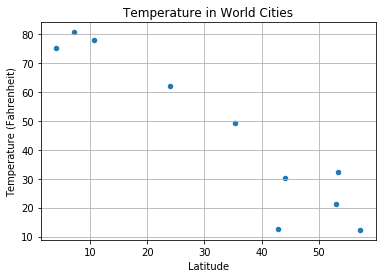

In [198]:
temp_plot = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Temperature (Fahrenheit)",
                marker="o",
                title="Temperature in World Cities",
                grid=True
               );

fig = temp_plot.get_figure()
fig.savefig("TemperatureWorldCities.png");

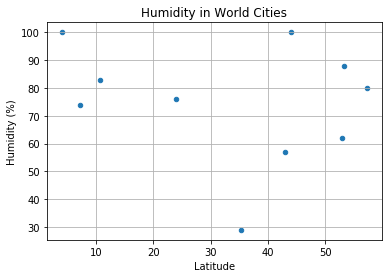

In [199]:
humidity_plot = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Humidity (%)",
                marker="o",
                title="Humidity in World Cities",
                grid=True
               );

fig = humidity_plot.get_figure()
fig.savefig("HumidityWorldCities.png");

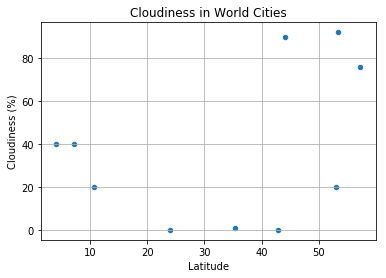

In [200]:
cloud_plot = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Cloudiness (%)",
                marker="o",
                title="Cloudiness in World Cities",
                grid=True
               );

fig = cloud_plot.get_figure()
fig.savefig("CloudinessWorldCities.png");

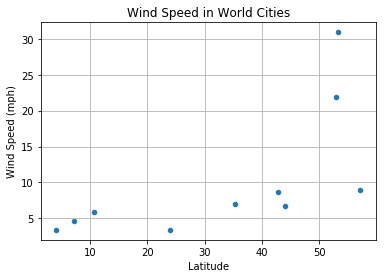

In [201]:
wind_plot = weather_df.plot(kind="scatter",
                x="Latitude", 
                y="Wind Speed (mph)",
                marker="o",
                title="Wind Speed in World Cities",
                grid=True
               );

fig = wind_plot.get_figure()
fig.savefig("WindWorldCities.png");